**Homework 2:** *Data-Driven Modeling for Engineers* (ME 2063) - Instructor: H. Babaee,  **Due: 4:00 pm, January 26, 2023.**

Download *Data.npz* from Canvas. The data set contains input vector $x$ and noisy measurements $y$. The data set contains $N=50$ measurements.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# load the data set
data = np.load('Data-HW2.npz')
X = data['X']
Y = data['Y']

print(X.shape)
print(Y.shape)

(50, 1)
(50, 1)


In [3]:
# descriptive statistics
data = pd.DataFrame(dict(X=X[:,0], Y=Y[:,0]))
data.describe()

,X,Y
count,50.000000,50.000000
mean,0.500000,0.085211
std,0.297498,0.913089
min,0.000000,-1.821754
25%,0.250000,-0.595392
50%,0.500000,0.180701
75%,0.750000,0.730295
max,1.000000,1.928662


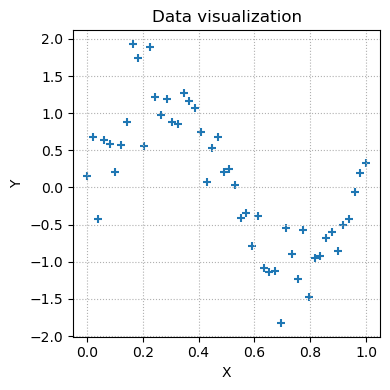

In [4]:
# data visualization
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title('Data visualization')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(linestyle=':')
ax.scatter(data.X, data.Y, marker='+')
fig.tight_layout()

# Problem 1
Consider the polynomial as basis functions: $\Phi(x)=[1,x, \dots, x^{K-1} ]$, where $K$ is the number of basis functions. The objective of this problem is to determine what choice of $K$ is optimal.


1.   Write a program to build different linear regression models in the form of $f(x;\boldsymbol{\theta}) = \sum_{i=1}^K \theta_i \phi_i(x)$  by varying the model complexity $K$. For each $K$, compute the *training error* and the *generalization error*.  Build 10 regression models by varying $K$ from $K=1$  to $K=10$. **Hint:** To compute the training error and the generalization error, *randomly* divide the data to two *disjoint* sets of  80\% training  data and 20\% test data.
2.    Plot the training and generalization errors in one figure with respect to $K$ and legend accordingly. **Hint:** For the definition of the errors, please refer to the lecture notes.
3.    What is the best model complexity? Please justify your answer. 

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1234)

In [6]:
def poly_basis(x, K):
    '''
    Polynomial basis functions.
    
    Args:
        x: (N, 1) input array.
        K: # of basis functions.
    Returns:
        (N, K) output array.
    '''
    return x ** np.arange(K)

poly_basis(x_train, K=3).shape

(40, 3)

In [7]:
def linear_model(x, theta, basis):
    '''
    Evaluate linear regression model.
    
    Args:
        x: (N, 1) input array.
        theta: (K, 1) parameter array.
        basis: Basis function(s).
    Returns:
        (N, 1) output array.
    '''
    phi = basis(x, K=len(theta))
    return phi @ theta

linear_model(x_train, theta=np.ones((3, 1)), basis=poly_basis).shape

(40, 1)

In [8]:
def linear_fit(x, y, K, basis):
    '''
    Fit linear regression model.
    
    Args:
        x: (N, 1) input array.
        y: (N, 1) target array.
        K: # of basis functions.
        basis: Basis function(s).
    Returns:
        theta: (K, 1) parameter array.
    '''
    phi = basis(x, K)
    A, b = phi.T @ phi, phi.T @ y
    return np.linalg.solve(A, b)

linear_fit(x_train, y_train, K=3, basis=poly_basis).shape

(3, 1)

In [9]:
def mse(y_pred, y_true):
    '''
    Mean squared error.
    
    Args:
        y_pred: (N, 1) output array.
        y_true: (N, 1) target array.
    Returns:
        Error value.
    '''
    return np.mean((y_pred - y_true)**2) / 2

In [10]:
K_range = np.arange(1, 11)

results = pd.DataFrame(columns=['model', 'data', 'K', 'MSE'])
results.set_index(['model', 'data', 'K'], inplace=True)

for K in K_range:
    
    # fit model parameters
    theta = linear_fit(x_train, y_train, K, poly_basis)
    
    # evaluate model predictions
    yp_train = linear_model(x_train, theta, poly_basis)
    yp_test = linear_model(x_test, theta, poly_basis)
    
    # compute mean squared error
    results.loc[('poly', 'train', K), 'MSE'] = mse(yp_train, y_train)
    results.loc[('poly', 'test', K), 'MSE']  = mse(yp_test, y_test)

results.sort_index(inplace=True)
results.unstack(level=1)

MSE          
data          test     train
model K                     
poly  1   0.471676  0.392946
      2   0.238097  0.228767
      3   0.271087  0.225693
      4   0.051888  0.068431
      5   0.058653  0.067009
      6   0.066502  0.059303
      7   0.064292  0.059043
      8   0.068046  0.058731
      9   0.063554  0.056096
      10  0.087406  0.055642

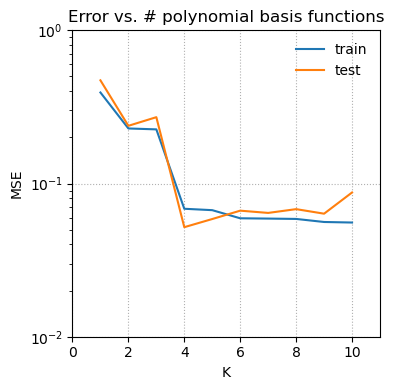

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title('Error vs. # polynomial basis functions')
ax.set_xlabel('K')
ax.set_ylabel('MSE')
ax.set_yscale('log')
ax.set_xlim(0, 11)
ax.set_ylim(0.01, 1.0)
ax.grid(linestyle=':')
ax.plot(K_range, results.loc['poly', 'train'].MSE, label='train')
ax.plot(K_range, results.loc['poly', 'test'].MSE, label='test')
ax.legend(frameon=False)
fig.tight_layout()

The figure above shows the relationship between the model error and the model complexity, as measured by the hyperparameter $K$, the number of polynomial basis functions.

The error on the training data steadily decreases as the model complexity increases. This is because $K$ increases the the number of degrees of freedom, which makes the model more flexible so it can better approximate the training data points.

The error on the test data also decreases at first. However, as $K$ increases beyond 4, the test error starts to increase. This indicates the point at which the model begins to fit noise in the training data.

Therefore, the optimal number of polynomial basis functions 4, because this is the point where the generalization error (as measured by error on the test set) is expected to be minimized.

# Problem 2
The objective of this problem is to compare the performance of two different bases functions. 


1.   Repeat Parts 1-3 from Problem 1 for a different choice of basis function. This time use *Gaussian radial basis (GRB) functions*, where $f(x;\boldsymbol{\theta}) = \sum_{i=0}^{K-1} \theta_i \phi_i(x)$ where $\Phi(x)=[\phi_0(x), \phi_1(x), \dots, \phi_{K-1}(x)]$, where:
\begin{align*}
    \phi_0(x) &= 1\\
    \phi_i(x) &= \exp\big(-\frac{(x-\mu_i)^2}{s^2}\big), \quad, i=1,2, \dots, K-1, 
\end{align*}
 `s = 0.2` and `mu = np.linspace(0,1,K-1)`.
2.  Which of these two bases functions (polynomial versus GRB)  would you choose for this problem? Please justify your answer. 


 

 




In [12]:
def gauss_basis(x, K, s=0.2):
    '''
    Gaussian basis functions.
    
    Args:
        x: (N, 1) input array.
        K: # of basis functions.
    Returns:
        (N, K) output array.
    '''
    phi = np.ones((len(x), K))
    mu = np.linspace(0, 1, K - 1)
    #mu = np.linspace(0, 1, K + 1)[1:-1]
    #s = 1 / K
    phi[:,1:] = np.exp(-(x - mu)**2 / s**2)
    return phi

gauss_basis(x_train, K=3).shape

(40, 3)

In [13]:
for K in K_range:
    
    # fit model parameters
    theta = linear_fit(x_train, y_train, K, gauss_basis)
    
    # evaluate model predictions
    yp_train = linear_model(x_train, theta, gauss_basis)
    yp_test = linear_model(x_test, theta, gauss_basis)
    
    # compute mean squared error
    results.loc[('gauss', 'train', K), 'MSE'] = mse(yp_train, y_train)
    results.loc[('gauss', 'test', K), 'MSE']  = mse(yp_test, y_test)

results.sort_index(inplace=True)
results.unstack(level=1)

MSE          
data          test     train
model K                     
gauss 1   0.471676  0.392946
      2   0.345828  0.361043
      3   0.356705  0.327391
      4   0.356337  0.327382
      5   0.096545  0.071883
      6   0.070798  0.059105
      7   0.064676  0.059051
      8   0.058021  0.054508
      9   0.057167  0.054506
      10  0.057311  0.054502
poly  1   0.471676  0.392946
      2   0.238097  0.228767
      3   0.271087  0.225693
      4   0.051888  0.068431
      5   0.058653  0.067009
      6   0.066502  0.059303
      7   0.064292  0.059043
      8   0.068046  0.058731
      9   0.063554  0.056096
      10  0.087406  0.055642

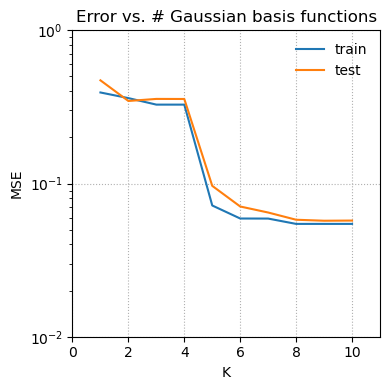

In [14]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title('Error vs. # Gaussian basis functions')
ax.set_xlabel('K')
ax.set_ylabel('MSE')
ax.set_yscale('log')
ax.set_xlim(0, 11)
ax.set_ylim(0.01, 1.0)
ax.grid(linestyle=':')
ax.plot(K_range, results.loc['gauss', 'train'].MSE, label='train')
ax.plot(K_range, results.loc['gauss', 'test'].MSE, label='test')
ax.legend(frameon=False)
fig.tight_layout()

In this figure, we plot the mean squared error with respect to the number of Gaussian radial basis functions. In this case, both the train and test error decrease as the model complexity increases. In contrast with the polynomial model, we do not see a point beyond which the test error worsens as we increase the number of basis functions. Therefore, the best choice for $K$ out the options we evaluated is 10 radial basis functions.

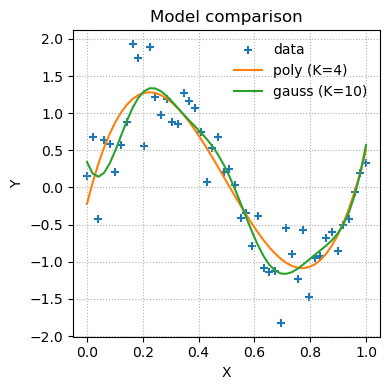

In [16]:
# model comparison
theta_poly = linear_fit(x_train, y_train, 4, poly_basis)
theta_gauss = linear_fit(x_train, y_train, 10, gauss_basis)

x_plot = np.linspace(0, 1)[:,np.newaxis]
yp_poly = linear_model(x_plot, theta_poly, poly_basis)
yp_gauss = linear_model(x_plot, theta_gauss, gauss_basis)

fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title('Model comparison')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(linestyle=':')
ax.scatter(data.X, data.Y, marker='+', label='data')
ax.plot(x_plot, yp_poly, label='poly (K=4)', color='C1')
ax.plot(x_plot, yp_gauss, label='gauss (K=10)', color='C2')
ax.legend(frameon=False)
fig.tight_layout()

Finally, we compare the best polynomial model with the best Gaussian model by plotting their predicted values against the input value, with the data points shown as well.

Qualitatively, we can see that the Gaussian model has multiple local maxima and minima, while the polynomial model only has one local maximum and one local minimum. This is in line with our expectation that more complex models exhibit more curvature on noisy data, and the Gaussian model has 10 basis functions compared to only 4 for the polynomial model.

In quantitative terms, the polynomial model has test error of 0.05188 and the Gaussian model has test error of 0.05731. The polynomial model is not only simpler, but actually has better generalization error than the Gaussian model. For these reasons, I would select the polynomial model as the best option out of all the models tested.